In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, robust_scale,minmax_scale
ds_fitness = pd.read_excel("./실습파일/빅데이터분석.xlsx", sheet_name="FITNESS") #xlrd 최신으로! 안하면 엑셀파일 안 읽어짐. pip install xlrd
# ds_fitness = pd.read_csv("./실습파일/FITNESS.xlsx", engine = "python")

In [2]:
ds_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48,168


In [3]:
ds_fitness.iloc[:,0:3]

,NAME,GENDER,AGE
0,Donna,여성,42
1,Gracie,NaN,38
2,Luanne,여성,43
3,Mimi,여성,50
4,Chris,남성,49
5,Allen,남성,38
6,Nancy,여성,49
7,Patty,여성,52
8,Suzanne,여성,57
9,Teresa,여성,51


In [4]:
ds_fitness.isnull()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


## .isnull().sum()하면 각 필드별 null 값들 개수를 정리해서 보여줌

In [5]:
ds_fitness.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

## .head()의 경우 상위 5개 행만 보여준다.

In [6]:
#pandas.DataFrame.fillna(값, inplace: 결측치 입력 후 저장 여부)
ds_fitness["GENDER"].fillna("여성",inplace = True)
ds_fitness.head() # 맨 위 5개 행만 보여주는 메소드

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [7]:
ds_fitness.isnull()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [8]:
ds_fitness.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [9]:
ds_fitness.groupby("GENDER")["WEIGHT"].agg("mean") # GENDER별 WEIGHT 변수의 평균

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [10]:
ds_fitness.groupby("GENDER")["WEIGHT"].transform("mean").head() # 각 행에 GENDER별 WEIGHT 변수의 평균

0    72.908750
1    72.908750
2    72.908750
3    72.908750
4    82.433077
Name: WEIGHT, dtype: float64

In [11]:
ds_fitness["WEIGHT"] = ds_fitness['WEIGHT'].fillna(ds_fitness.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
ds_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [12]:
ds_fitness.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [13]:
# select_dtypes: 특정 변수 타입을 선택/제외하여 데이터 추출
# 여기서 object는 문자형을 의미.
ds_fitness_char = ds_fitness.select_dtypes(include = "object") # 그래서 include하면 문자형만 뽑아주고
ds_fitness_numeric = ds_fitness.select_dtypes(exclude = "object")# exclude 하면 문자형은 빠짐.
ds_fitness_char # 문자형
ds_fitness_numeric.head() # 숫자형

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [14]:
# 표준화 mean = 0, S.D = 1로 계산해주는 scale(변수) 메소드
ds_scale = scale(ds_fitness_numeric)
ds_scale = pd.DataFrame(ds_scale, columns = ds_fitness_numeric.columns)
ds_scale.head()
# OXY는 목표변수이기 때문에 원래는 스케일 변환을 하면 안된다.

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.839365,-1.137916,2.327059,-1.770249,-0.361434,-0.951242,-0.196803
1,-1.533241,0.528757,2.419415,-1.433216,0.035184,-0.494940,1.356151
2,-0.665896,1.011023,1.320686,-1.418562,-1.352978,-0.666054,-0.640504
3,0.548385,-0.807497,1.383275,-1.220739,-2.344523,-0.494940,-2.082533
4,0.374916,0.597149,0.339692,-1.198758,1.026728,-0.723091,1.245226


In [15]:
# 기술통계 메소드 describe
ds_scale_describe = ds_scale.describe()
ds_scale_describe.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.707,-2.240,-1.906,-1.770,-2.345,-0.951,-2.083
25%,-0.666,-0.524,-0.460,-0.591,-0.659,-0.495,-0.641
50%,0.201,-0.008,-0.115,-0.085,0.035,-0.210,-0.197
75%,0.722,0.618,0.526,0.501,0.630,0.218,0.691
max,1.763,1.714,2.419,2.523,1.622,4.981,2.022


In [16]:
# 최소 최대값 표준화 최대 = 1 최소 =0으로 계산해주는 minmax_scale(변수) 메소드
ds_minmax_scale = minmax_scale(ds_fitness_numeric)
ds_minmax_scale = pd.DataFrame(ds_minmax_scale, columns = ds_fitness_numeric.columns)
ds_minmax_scale.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64.
  


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.076923,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.048077,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.076923,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.038462,0.810811


In [17]:
# 기술통계 메소드 describe
ds_minmax_scale_describe = ds_minmax_scale.describe()
ds_minmax_scale_describe.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,0.492,0.566,0.441,0.412,0.591,0.160,0.507
std,0.293,0.257,0.235,0.237,0.256,0.171,0.248
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.434,0.334,0.275,0.425,0.077,0.351
50%,0.550,0.564,0.414,0.392,0.600,0.125,0.459
75%,0.700,0.723,0.562,0.529,0.750,0.197,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [18]:
# 중앙값 = 0 변환. Quartile Rate 이용 이상치 영향이 줄어 듦.
ds_robust_scale = robust_scale(ds_fitness_numeric)
ds_robust_scale = pd.DataFrame(ds_robust_scale, columns = ds_fitness_numeric.columns)
ds_robust_scale.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.750,-0.988678,2.476919,-1.543624,-0.307692,-1.04,0.000000
1,-1.250,0.469888,2.570599,-1.234899,0.000000,-0.40,1.166667
2,-0.625,0.891936,1.456111,-1.221477,-1.076923,-0.64,-0.333333
3,0.250,-0.699516,1.519597,-1.040268,-1.846154,-0.40,-1.416667
4,0.125,0.529740,0.461047,-1.020134,0.769231,-0.72,1.083333


In [19]:
ds_robust_scale.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,-0.145161,0.007154,0.116482,0.077939,-0.027295,0.294194,0.147849
std,0.732502,0.889602,1.031110,0.931150,0.788614,1.425765,0.763675
min,-1.375000,-1.952905,-1.816704,-1.543624,-1.846154,-1.040000,-1.416667
25%,-0.625000,-0.451815,-0.350237,-0.463087,-0.538462,-0.400000,-0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.375000,0.548185,0.649763,0.536913,0.461538,0.600000,0.666667
max,1.125000,1.507468,2.570599,2.389262,1.230769,7.280000,1.666667


In [20]:
ds_rstpulse = pd.DataFrame() # empty dataframe!
ds_rstpulse["Raw"] = ds_fitness["RSTPULSE"]
ds_rstpulse["Scale"] = ds_scale["RSTPULSE"]
ds_rstpulse["Robust"] = ds_robust_scale["RSTPULSE"]
ds_rstpulse["MinMax"] = ds_minmax_scale["RSTPULSE"]
ds_rstpulse.round(3).head()

,Raw,Scale,Robust,MinMax
0,40,-0.951,-1.04,0.000
1,48,-0.495,-0.40,0.077
2,45,-0.666,-0.64,0.048
3,48,-0.495,-0.40,0.077
4,44,-0.723,-0.72,0.038


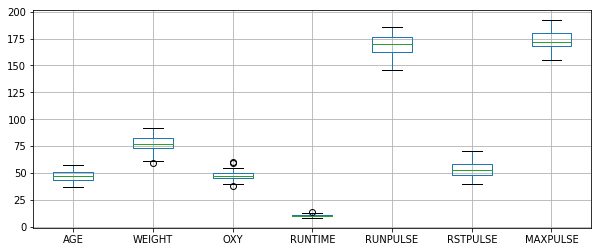

In [25]:
ds_fitness.boxplot(figsize = (10,4))

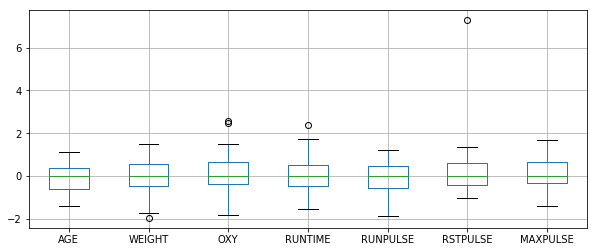

In [22]:
ds_robust_scale.boxplot(figsize = (10,4))

In [23]:
ds_fitness["RSTPULSE"] >= 100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [24]:
# RSTPULSE에서 100보다 작은 값만 가져오기!
ds_fitness = ds_fitness[ds_fitness["RSTPULSE"]<100]
ds_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168
